# **Introducing**



Cardiovascular diseases (CVDs) stand as the leading cause of mortality globally, claiming an estimated 17.9 million lives annually, accounting for 31% of all deaths worldwide. Among the common occurrences stemming from CVDs is heart failure, and within this dataset are 12 features that can be leveraged to forecast mortality resulting from heart failure.

A significant proportion of cardiovascular diseases can be averted by addressing behavioral risk factors such as tobacco usage, unhealthy dietary patterns leading to obesity, lack of physical activity, and detrimental alcohol consumption. Implementing population-wide strategies can effectively mitigate these risk factors.

Individuals grappling with cardiovascular diseases or those at elevated cardiovascular risk due to factors like hypertension, diabetes, hyperlipidemia, or pre-existing ailments necessitate early detection and proactive management, where machine learning models prove immensely beneficial.

To facilitate this investigation, a dataset sourced from Kaggle is utilized, containing information extracted from the research that conducted by Davide Chicco and Giuseppe Jurman, demonstrating the capability of machine learning in predicting the survival of patients experiencing heart failure solely based on serum creatinine and ejection fraction. This dataset consists of 299 rows and 13 columns. The model developed for this project will be implemented using Streamlit.

# **Import Libraries**

The libraries needed to model a linear regression include numpy, pandas, sympy, seaborn, matplotlib, dython nominal, joblib, and sklearn.

In [41]:
import numpy as np
import pandas as pd
from dython.nominal import associations

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["ggplot"])
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay
import pickle

In [42]:
import warnings
warnings.filterwarnings('ignore')

# **Data Loading**

The required dataset will be read by the program.

In [43]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Display the number of rows and columns.

In [44]:
df.shape

(299, 13)

Summary information about the DataFrame

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Summary of descriptive statistics from DataFrame

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# **Data Cleaning**

Data cleaning aims to identify, handle, and clean problems in the dataset. In this program, letters in columns become lowercase.

In [47]:
df.columns = df.columns.str.lower()

Categorizes columns in the DataFrame into categorical and numerical types and prints the names of these columns for a quick overview of cardiovascular health-related data.

In [48]:
cat_column = ['anaemia','diabetes','high_blood_pressure','sex','smoking','death_event']
num_column = [i for i in df.columns if i not in cat_column]

print(f"Categorical Columns\t: {list(cat_column)}")
print(f"Numerical Columns\t: {list(num_column)}")

Categorical Columns	: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']
Numerical Columns	: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


The code iterates through categorical columns and replaces binary values with more descriptive labels; specifically, it replaces '0' with 'female' and '1' with 'male' for the 'sex' column, '0' with 'survived' and '1' with 'dead' for the 'death_event' column, and '0' with 'no' and '1' with 'yes' for other categorical columns.

In [49]:
for i in cat_column:
    if i == 'sex':
        df[i] = df[i].replace({0:"female",1:"male"})
    elif i == 'death_event':
        df[i] = df[i].replace({0:"survived",1:"dead"})
    else:
        df[i] = df[i].replace({0:"no",1:"yes"})

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,no,582,no,20,yes,265000.00,1.9,130,male,no,4,dead
1,55.0,no,7861,no,38,no,263358.03,1.1,136,male,no,6,dead
2,65.0,no,146,no,20,no,162000.00,1.3,129,male,yes,7,dead
3,50.0,yes,111,no,20,no,210000.00,1.9,137,male,no,7,dead
4,65.0,yes,160,yes,20,no,327000.00,2.7,116,female,no,8,dead


Contains information about the number of null values ​​for each column of the DataFrame. The columns with the most null values ​​at the top and ordered in descending order.

In [50]:
df_null=pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
df_null.index.name='Columns'
df_null.columns=['Null Values']
df_null.reset_index()

,Columns,Null Values
0,age,0
1,anaemia,0
2,creatinine_phosphokinase,0
3,diabetes,0
4,ejection_fraction,0
5,high_blood_pressure,0
6,platelets,0
7,serum_creatinine,0
8,serum_sodium,0
9,sex,0


Find the correlation between numerical and categorical variables with the help of *dython* library.

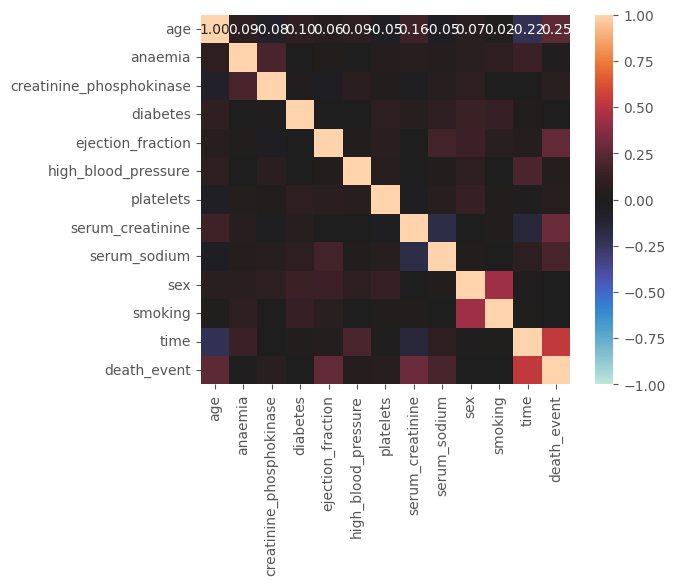

In [51]:
corr = associations(df)

Because we want to know which features that affect the *death events* the most and reduce the computational cost as well, we'll sort the correlation coefficients in descending order.

"x = 0.1" serves as a marker to clearly delineate the correlation coefficients below 0.1, helping to highlight and identify features with correlations lower than 0.1.

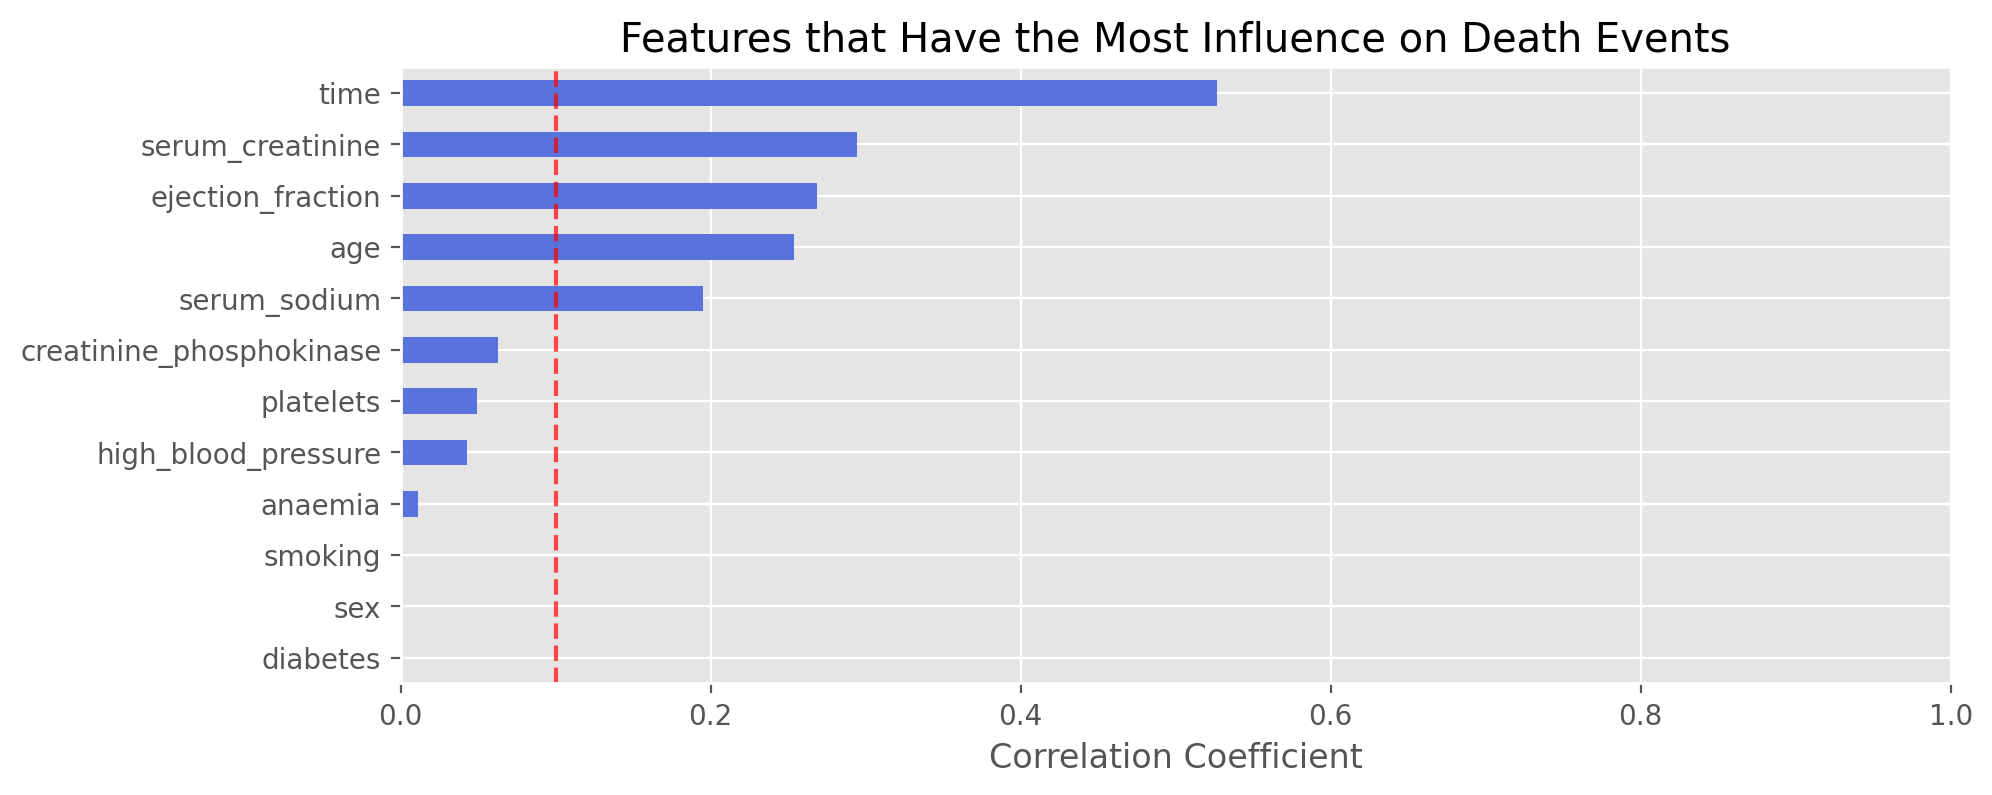

In [52]:
sort_corr = abs(corr["corr"][["death_event"]].drop("death_event")).sort_values("death_event",ascending=False)

fig = plt.figure(figsize=(10,4),dpi=200)
sort_corr.sort_values("death_event").plot(
    kind="barh",
    legend=None,
    color="#5874DC",
    ax=plt.gca()
)
plt.axvline(x=0.1,color="red",linestyle="--",alpha=0.7)
plt.title("Features that Have the Most Influence on Death Events")
plt.xlabel("Correlation Coefficient")
plt.xlim(0,1)
plt.show()

 Filter and select columns based on their correlation with the 'death_event,' retaining only those with correlation coefficients equal to or exceeding 0.1 (positive or negative), effectively removing columns with correlations below 0.1.

In [53]:
df_corr = corr["corr"][["death_event"]].iloc[:-1].sort_values("death_event",ascending=False)
selected_columns = df_corr[(df_corr["death_event"] >= 0.1) | (df_corr["death_event"] <= -0.1)].index
df = pd.concat([df[selected_columns],df['death_event']], axis = 1)
df.head()

,time,serum_creatinine,ejection_fraction,age,serum_sodium,death_event
0,4,1.9,20,75.0,130,dead
1,6,1.1,38,55.0,136,dead
2,7,1.3,20,65.0,129,dead
3,7,1.9,20,50.0,137,dead
4,8,2.7,20,65.0,116,dead


# **Data Exploration**

Visualize a histogram to examine the distribution of the 'time' variable in the dataset, distinguishing between 'death' and 'survival' events.

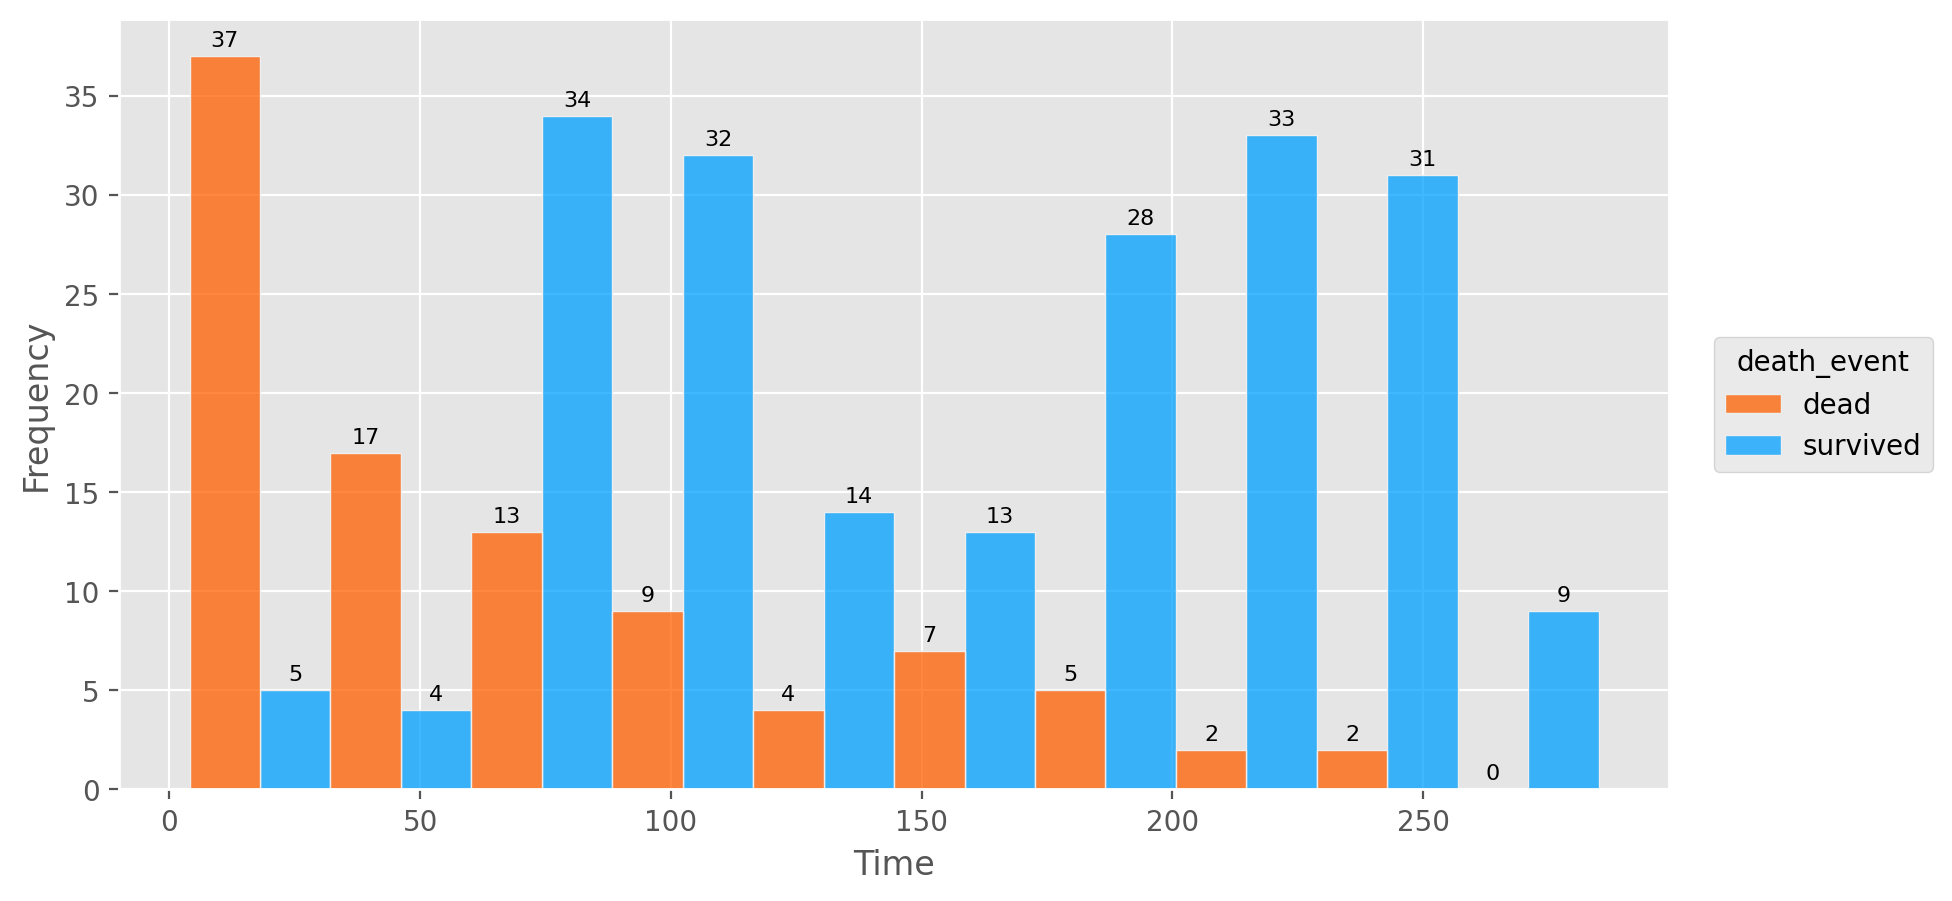

In [54]:
plt.figure(figsize=(10,5),dpi=200)
ax = sns.histplot(df,x="time",hue="death_event",palette=["#FF5F00","#00A0FF"],multiple="dodge",bins=10)

for container in ax.containers:
    ax.bar_label(container,color="black",fontsize=8,padding=2)

sns.move_legend(ax,loc="center left",bbox_to_anchor=(1.02,0.5))
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

To plot multiple pairwise bivariate distributions in a dataset, use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

[]

<Figure size 1500x1000 with 0 Axes>

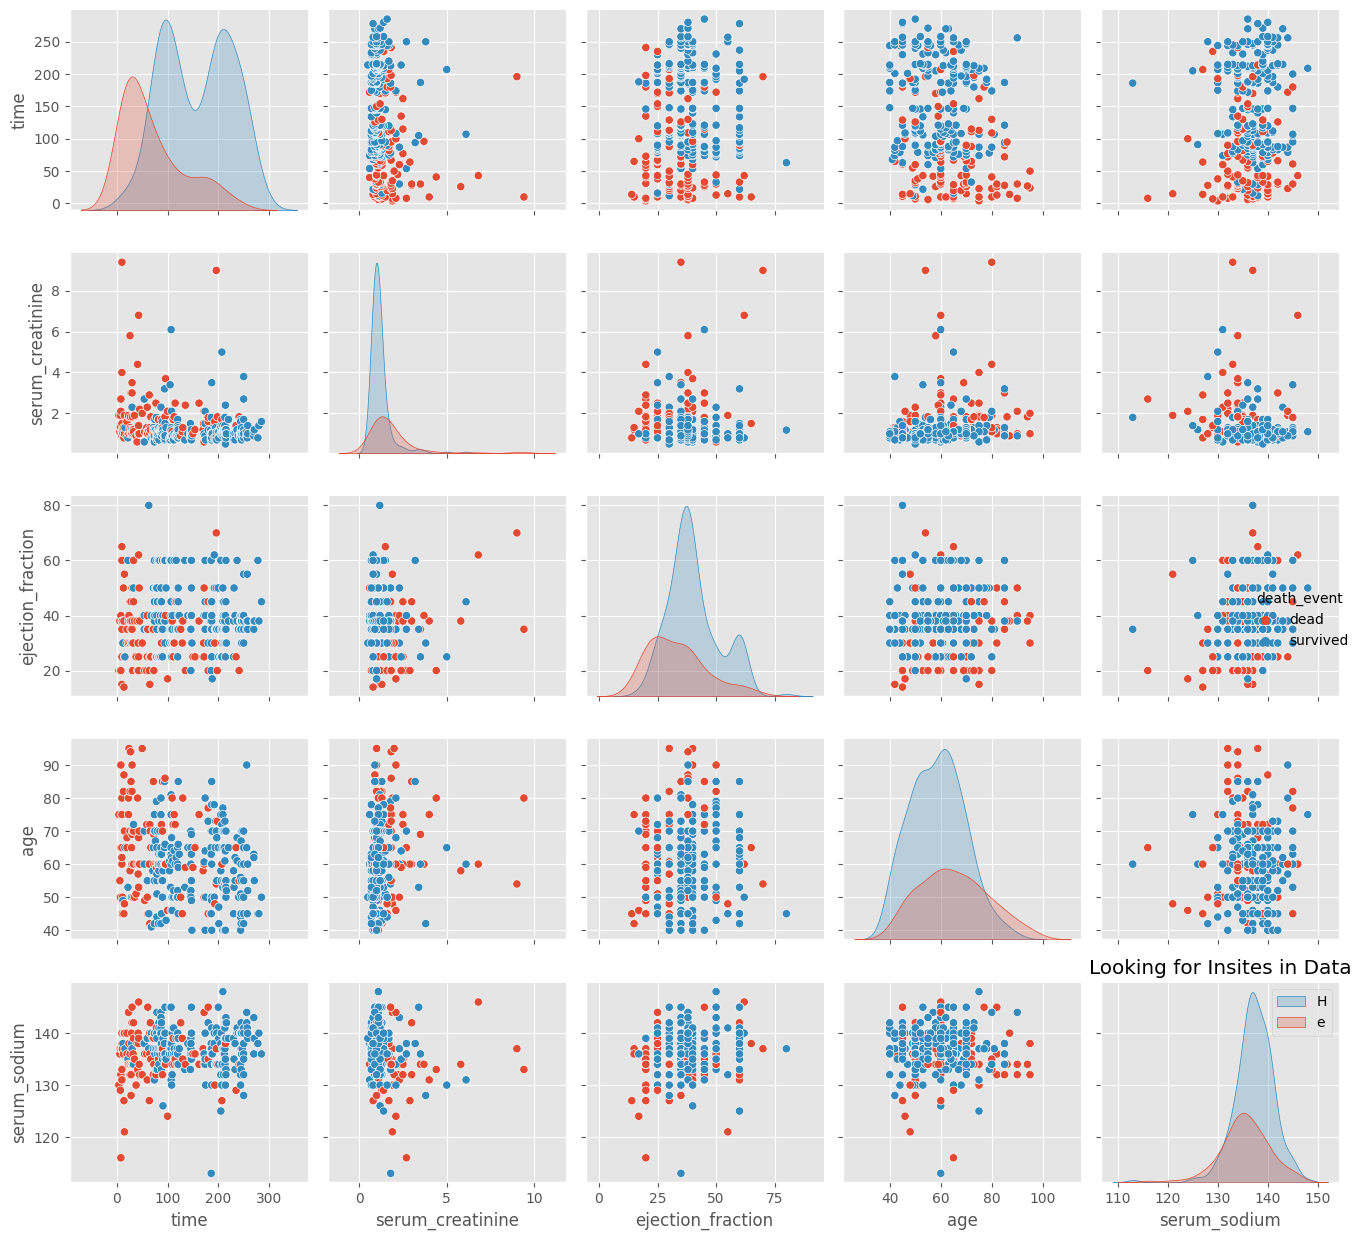

In [55]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="death_event")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

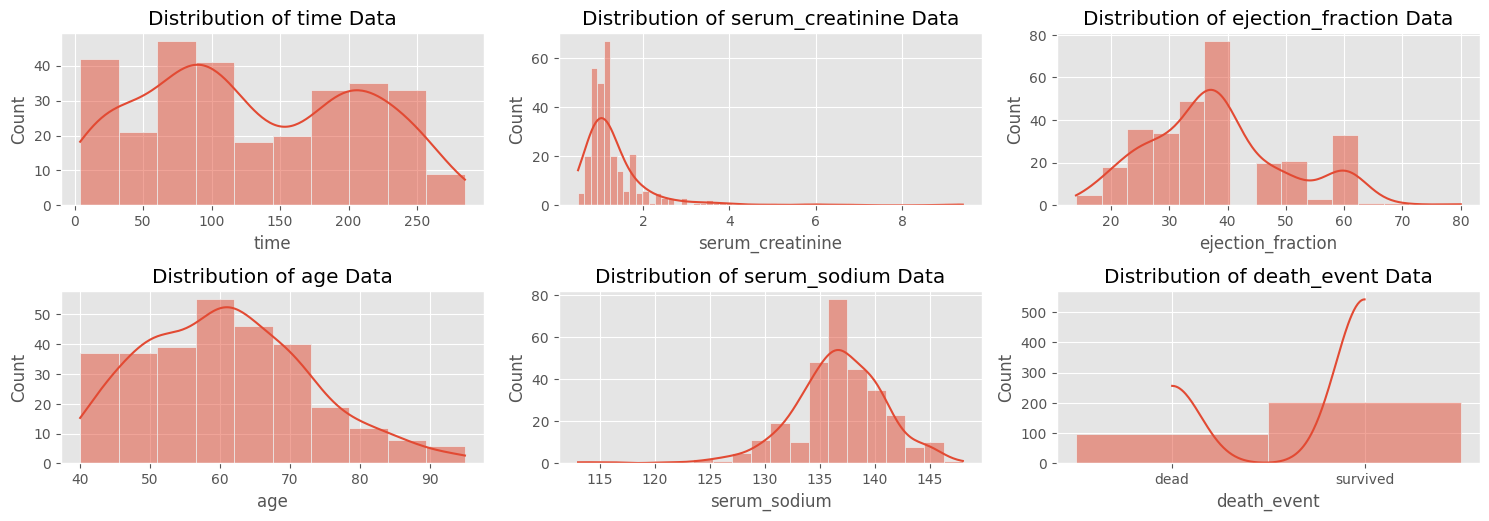

In [56]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

# **Data Pre-processing**

Define features (X) and target (y) variables.

In [57]:
X = df.drop("death_event",axis=1)
y = df["death_event"]

Divide the dataset into two parts, training data and testing data with a ratio of 80:20.

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1221)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 239
Testing dataset		: 60


Perform feature scaling on training data and testing data.

In [59]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# **Model Definition**

Initializes a Random Forest Classifier with 7 decision trees.

In [60]:
rf_model = RandomForestClassifier(n_estimators=7,max_depth=5,class_weight='balanced',random_state=42)

Initializes a Gradient Boosting Classifier with 13 base estimators

In [61]:
gb_model = GradientBoostingClassifier(n_estimators=13,random_state=42)

# **Testing Model**

Train a model using training data.

### Random Forest

In [62]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=7,
                       random_state=42)

Utilizes a pre-trained Random Forest Classifier to predict the class labels and probability estimates on the testing data.

In [63]:
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)

### Gradient Boosting

In [64]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=13, random_state=42)

Utilizes a pre-trained Gradient Boosting Classifier to predict the class labels and probability estimates on the testing data.

In [65]:
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)

# **Evaluating Model**

Measuring how well a model can make predictions on data.

In the target variable, the occurrence of 0 is more frequent than 1, leading to data imbalance. As a response to this imbalance, four metrics—accuracy, recall, precision, and F1 score—are employed.

### Random Forest

Calculates and rounds the accuracy, precision, recall, and F1 score metrics for a Random Forest Classifier model's predictions on a test set.

In [66]:
rf_accuracy=np.round(accuracy_score(y_test,rf_pred),3)
rf_precision=np.round(precision_score(y_test,rf_pred,pos_label='dead'),3)
rf_recall=np.round(recall_score(y_test,rf_pred,pos_label='dead'),3)
rf_f1=np.round(f1_score(y_test,rf_pred,pos_label='dead'),3)

Generate and display a confusion matrix for Random Forest Classifier predictions on a test set, and prints the corresponding accuracy score.

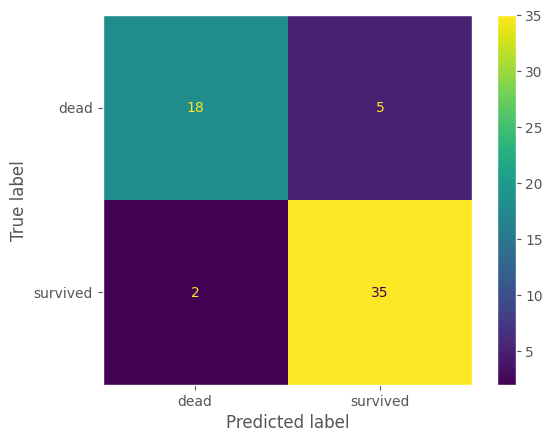

Accuracy Score: 88.3%


In [67]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,rf_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {rf_accuracy*100}%")

A comprehensive classification report for the Random Forest Classifier model.

In [68]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

        dead       0.90      0.78      0.84        23
    survived       0.88      0.95      0.91        37

    accuracy                           0.88        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.88      0.88      0.88        60



Evaluation metrics for the Random Forest Classifier model.

In [69]:
rf_score = {
    'Model': 'Random Forest',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'f1': rf_f1
}
rf_score = pd.DataFrame(rf_score, index=[''])
rf_score

,Model,Accuracy,Precision,Recall,f1
,Random Forest,0.883,0.9,0.783,0.837


Visualizes a bar chart depicting the importance levels of variables in a Random Forest Classifier, calculated based on their contribution to the model's predictions, where lower values indicate less importance.

Text(0, 0.5, 'Variables')

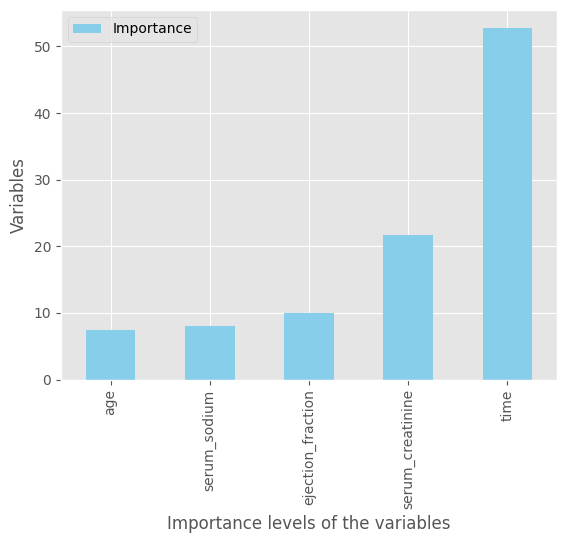

In [70]:
rf_importance = pd.DataFrame({"Importance": rf_model.feature_importances_ * 100},
                         index = pd.DataFrame(X_train).columns)
rf_importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "bar", color = "skyblue")
plt.xlabel("Importance levels of the variables")
plt.ylabel("Variables")

### Gradient Boosting

Calculates and rounds the accuracy, precision, recall, and F1 score metrics for a Gradient Boosting Classifier model's predictions on a test set.

In [71]:
gb_accuracy=np.round(accuracy_score(y_test,gb_pred),3)
gb_precision=np.round(precision_score(y_test, gb_pred,pos_label='dead'),3)
gb_recall=np.round(recall_score(y_test, gb_pred,pos_label='dead'),3)
gb_f1=np.round(f1_score(y_test, gb_pred,pos_label='dead'),3)

Generate and display a confusion matrix for Gradient Boosting Classifier predictions on a test set, and prints the corresponding accuracy score.

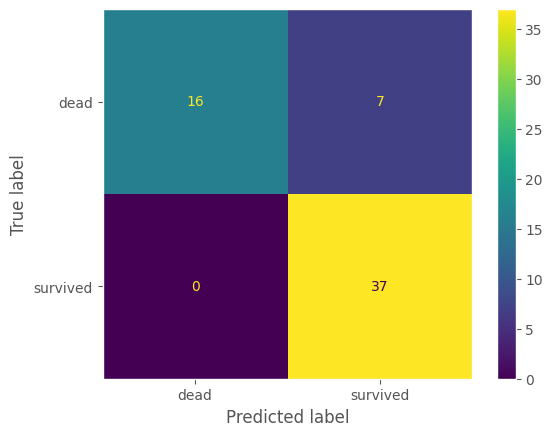

Accuracy Score: 88.3%


In [72]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,gb_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {gb_accuracy*100}%")

A comprehensive classification report for the Gradient Boosting Classifier model.

In [73]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

        dead       1.00      0.70      0.82        23
    survived       0.84      1.00      0.91        37

    accuracy                           0.88        60
   macro avg       0.92      0.85      0.87        60
weighted avg       0.90      0.88      0.88        60



Evaluation metrics for the Gradient Boosting Classifier model.

In [74]:
gb_score = {
    'Model': 'Gradient Boosting',
    'Accuracy': gb_accuracy,
    'Precision': gb_precision,
    'Recall': gb_recall,
    'f1': gb_f1
}
gb_score = pd.DataFrame(gb_score, index=[''])
gb_score

,Model,Accuracy,Precision,Recall,f1
,Gradient Boosting,0.883,1.0,0.696,0.821


Visualizes a bar chart depicting the importance levels of variables in a Gradient Boosting Classifier, calculated based on their contribution to the model's predictions, where lower values indicate less importance.

Text(0, 0.5, 'Variables')

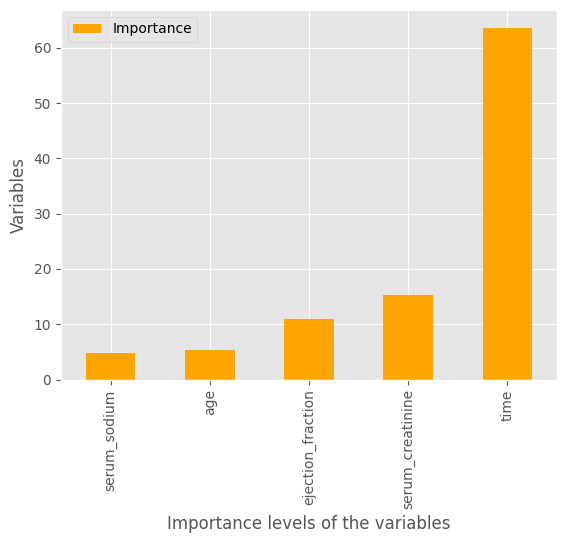

In [75]:
gb_importance = pd.DataFrame({"Importance": gb_model.feature_importances_ * 100},
                         index = pd.DataFrame(X_train).columns)
gb_importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "bar", color = "orange")
plt.xlabel("Importance levels of the variables")
plt.ylabel("Variables")

The evaluation scores of two machine learning models, into a single DataFrame.

In [76]:
all_model_scores=pd.concat([rf_score,gb_score])
all_model_scores

,Model,Accuracy,Precision,Recall,f1
,Random Forest,0.883,0.9,0.783,0.837
,Gradient Boosting,0.883,1.0,0.696,0.821


Creates a subplot with four vertically stacked bar charts. Each bar chart represents evaluation scores for two machine learning models, Random Forest and Gradient Boosting, across four different performance metrics: Accuracy, Precision, Recall, and F1 Score.

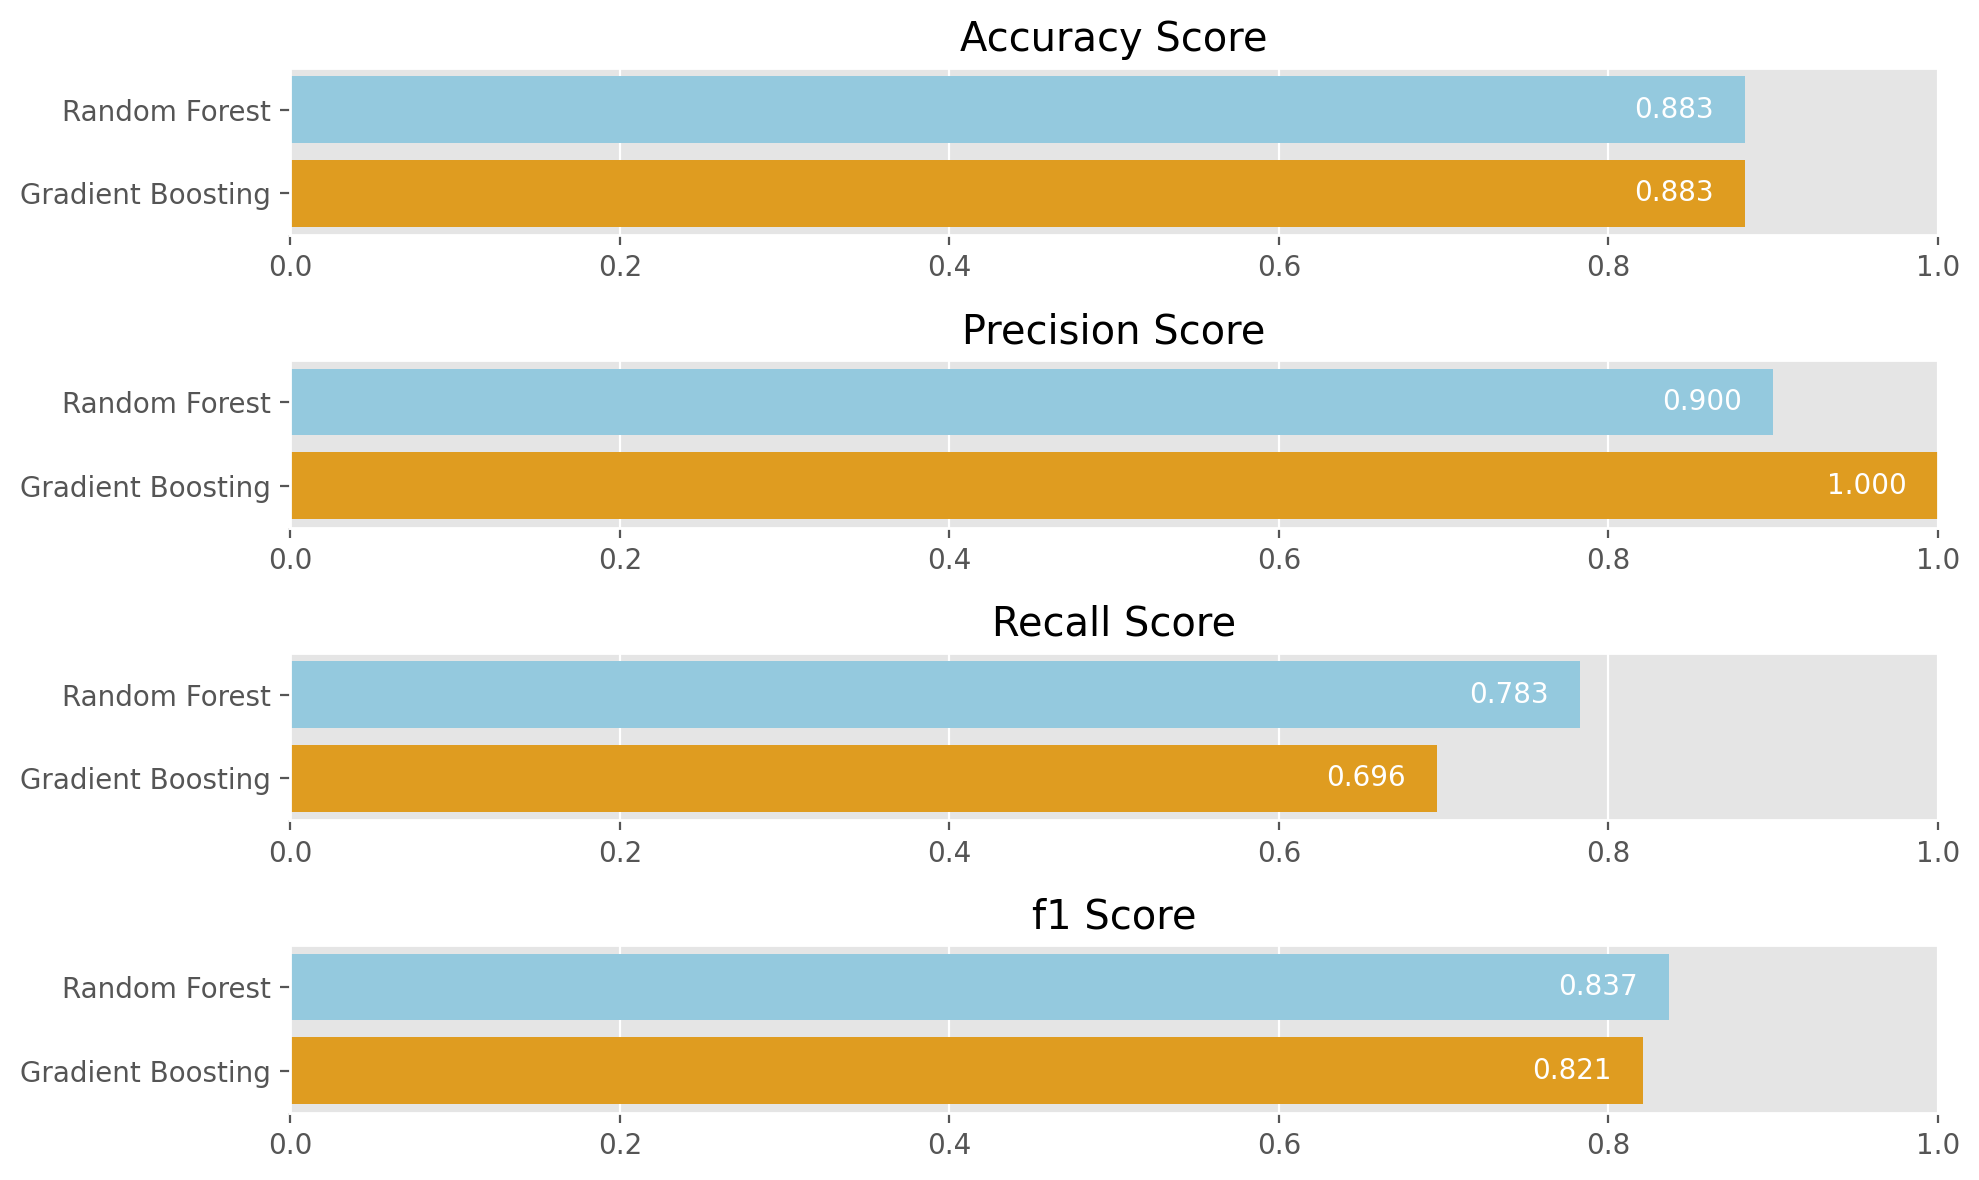

In [77]:
fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=4,ncols=1)

barplot = sns.barplot(
    x=[rf_accuracy,gb_accuracy],
    y=["Random Forest","Gradient Boosting"],
    palette=["skyblue","orange"],
    ax=ax[0]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.3f",padding=-40,color="white")
ax[0].set_title("Accuracy Score")
ax[0].set_xlim(0,1)

barplot = sns.barplot(
    x=[rf_precision,gb_precision],
    y=["Random Forest","Gradient Boosting"],
    palette=["skyblue","orange"],
    ax=ax[1]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.3f",padding=-40,color="white")
ax[1].set_title("Precision Score")
ax[1].set_xlim(0,1)

barplot = sns.barplot(
    x=[rf_recall,gb_recall],
    y=["Random Forest","Gradient Boosting"],
    palette=["skyblue","orange"],
    ax=ax[2]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.3f",padding=-40,color="white")
ax[2].set_title("Recall Score")
ax[2].set_xlim(0,1)

barplot = sns.barplot(
    x=[rf_f1,gb_f1],
    y=["Random Forest","Gradient Boosting"],
    palette=["skyblue","orange"],
    ax=ax[3]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.3f",padding=-40,color="white")
ax[3].set_title("f1 Score")
ax[3].set_xlim(0,1)

plt.tight_layout()
plt.show()

### Random Forest

Comparing the predictions and actual outcomes from a Random Forest Classifier, including columns for survival and death probabilities, the model's predictions, the actual target values, and a conclusion column indicating whether the predictions match the actual outcomes.

In [78]:
act_vs_pred_rf = pd.DataFrame({"probability_survived":rf_pred_proba[:,1] * 100,
                               "probability_dead":rf_pred_proba[:,0] * 100,
                               'random_forest_prediction': rf_pred,
                               'actual': y_test,
                               "conclusion":[True if i == j else False for i,j in zip(y_test,rf_pred)]}).reset_index(drop=True)

act_vs_pred_rf

,probability_survived,probability_dead,random_forest_prediction,actual,conclusion
0,57.142857,42.857143,survived,survived,True
1,43.514347,56.485653,dead,dead,True
2,40.774710,59.225290,dead,dead,True
3,71.428571,28.571429,survived,dead,False
4,94.862443,5.137557,survived,survived,True
5,73.776493,26.223507,survived,survived,True
6,51.633946,48.366054,survived,survived,True
7,72.677894,27.322106,survived,survived,True
8,14.257454,85.742546,dead,dead,True
9,94.862443,5.137557,survived,survived,True


### Gradient Boosting

Comparing the predictions and actual outcomes from a Gradient Boosting Classifier, including columns for survival and death probabilities, the model's predictions, the actual target values, and a conclusion column indicating whether the predictions match the actual outcomes.

In [79]:
act_vs_pred_gb = pd.DataFrame({"probability_survived":gb_pred_proba[:,1] * 100,
                               "probability_dead":gb_pred_proba[:,0] * 100,
                               'gradient_boosting_prediction': gb_pred,
                               'actual': y_test,
                               "conclusion":[True if i == j else False for i,j in zip(y_test,gb_pred)]}).reset_index(drop=True)

act_vs_pred_gb

,probability_survived,probability_dead,gradient_boosting_prediction,actual,conclusion
0,78.220149,21.779851,survived,survived,True
1,38.148004,61.851996,dead,dead,True
2,23.733658,76.266342,dead,dead,True
3,81.529213,18.470787,survived,dead,False
4,88.023329,11.976671,survived,survived,True
5,72.181025,27.818975,survived,survived,True
6,77.494653,22.505347,survived,survived,True
7,88.023329,11.976671,survived,survived,True
8,39.533574,60.466426,dead,dead,True
9,88.023329,11.976671,survived,survived,True


Save any final models for future use such as to make data's prediction that has never been seen before.

In [80]:
final_rf_model = RandomForestClassifier()
final_gb_model = GradientBoostingClassifier()

for i,j in zip([final_rf_model,final_gb_model],['rf.pkl','gb.pkl']):
    pickle.dump(i, open(j, 'wb'))
    print(j,"has been saved successfully!")

rf.pkl has been saved successfully!
gb.pkl has been saved successfully!


# **Conclusion**

The Heart Failure Prediction using Random Forest and Gradient Boosting classifiers has proven successful. To identify the most influential features affecting death events while optimizing computational efficiency, the correlation coefficients were sorted. Further refinement involved filtering columns based on correlation coefficients of 0.1 or higher, effectively eliminating less impactful features. Despite the data imbalance in the target variable, where occurrences of 0 dominate over 1, model evaluation employed accuracy, recall, precision, and F1 score metrics. Notably, higher metric values indicate improved predictive capabilities. In the comparative analysis, while Gradient Boosting displayed higher precision in predicting death cases, Random Forest excelled in both recall and F1 score, capturing a more comprehensive set of actual death instances and achieving a balanced trade-off between precision and recall. The choice between the models hinges on the specific emphasis on precision or recall, and further analysis on each algorithm is warranted to gain deeper insights and refine the models for more accurate results.